In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("./Iris.data", header=None)
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')

Text(0.5, 1.0, 'Label')

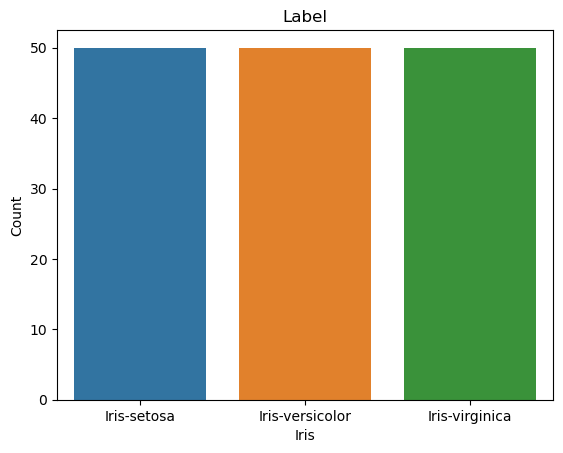

In [4]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="class")
plt.xlabel("Iris")
plt.ylabel("Count")
plt.title("Label")

In [5]:
# 레이블 갯수 확인 (숫자)
df['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [6]:
# 결측치 확인
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [7]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [8]:
X=df.drop('class', axis=1)
# class 컬럼 삭제하여 X에 저장, axis=1 이면 y축 기준
X.head()
# head()는 첫 5행만 출력함.

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
y=df['class']
y.value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값
X_train

,sepal length,sepal width,petal length,petal width
61,5.9,3.0,4.2,1.5
92,5.8,2.6,4.0,1.2
112,6.8,3.0,5.5,2.1
2,4.7,3.2,1.3,0.2
141,6.9,3.1,5.1,2.3
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2


In [11]:
X_train.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')

In [12]:
y_train

61     Iris-versicolor
92     Iris-versicolor
112     Iris-virginica
2          Iris-setosa
141     Iris-virginica
            ...       
9          Iris-setosa
103     Iris-virginica
67     Iris-versicolor
117     Iris-virginica
47         Iris-setosa
Name: class, Length: 112, dtype: object

In [13]:
X_test.head()

,sepal length,sepal width,petal length,petal width
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2


In [14]:
y_test.head()

114     Iris-virginica
62     Iris-versicolor
33         Iris-setosa
107     Iris-virginica
7          Iris-setosa
Name: class, dtype: object

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# max_iter = 1000

In [16]:
from sklearn.svm import SVC

iris_svm = SVC(random_state=0)
iris_svm.fit(X_train, y_train)

pred_svm = iris_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print('{:.5f}'.format(accuracy_score(y_test, pred_svm)))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.97368
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [17]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
#print (accuracy_score(y_test, pred_lr))
print('{:.5f}'.format(accuracy_score(y_test, pred_lr)))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.97368
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [18]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
#print (accuracy_score(y_test, pred_nn))
print('{:.5f}'.format(accuracy_score(y_test, pred_lr)))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.97368
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


C:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### 03/25 Regression 실습

In [19]:
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [32]:
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')

In [24]:
X = df.drop(['sepal length', 'class'],axis=1)
X.head()

,sepal width,petal length,petal width
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2


In [26]:
y = df['sepal length']
y.head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal length, dtype: float64

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.3,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(105, 3) (105,)
(45, 3) (45,)


In [68]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ly_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.3235340202101114


In [70]:
X_test.head()

,sepal width,petal length,petal width
40,3.5,1.3,0.3
146,2.5,5.0,1.9
38,3.0,1.3,0.2
99,2.8,4.1,1.3
143,3.2,5.9,2.3


In [71]:
y_test.head()

40     5.0
146    6.3
38     4.4
99     5.7
143    6.8
Name: sepal length, dtype: float64

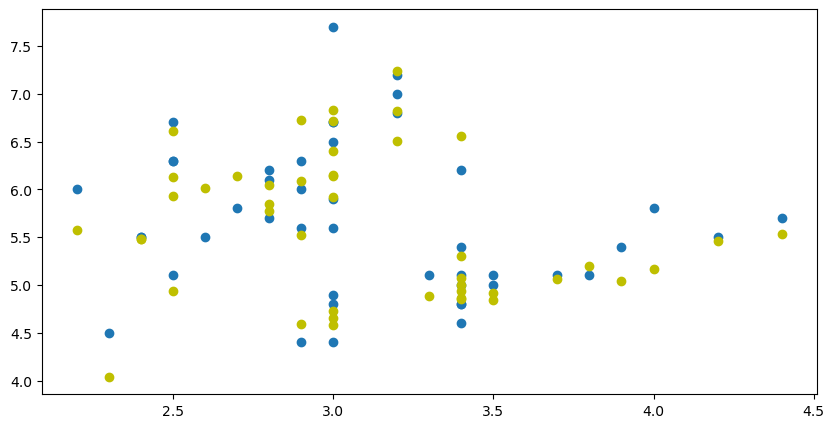

In [72]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['sepal width'], y_test, label='y_test')
plt.scatter(X_test['sepal width'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()         

In [54]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(dy_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.43598547376413055


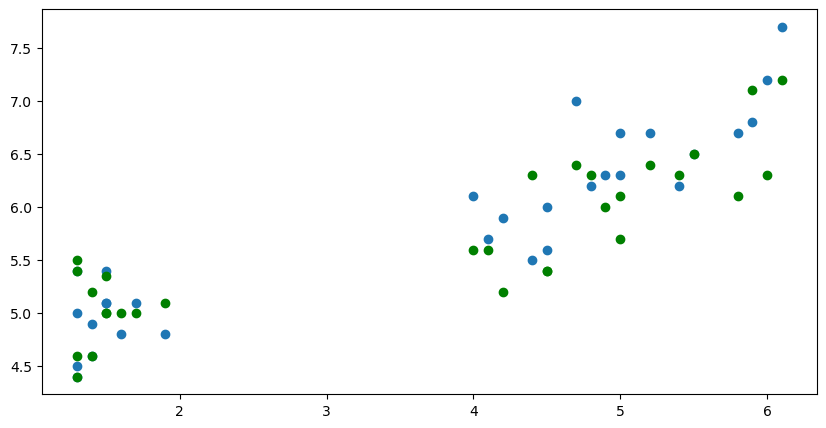

In [59]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['petal length'], y_test, label='y_test')
plt.scatter(X_test['petal length'], dy_preds, c='g', label='dy_preds')
plt.show()         

In [56]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ry_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.33684021900433464


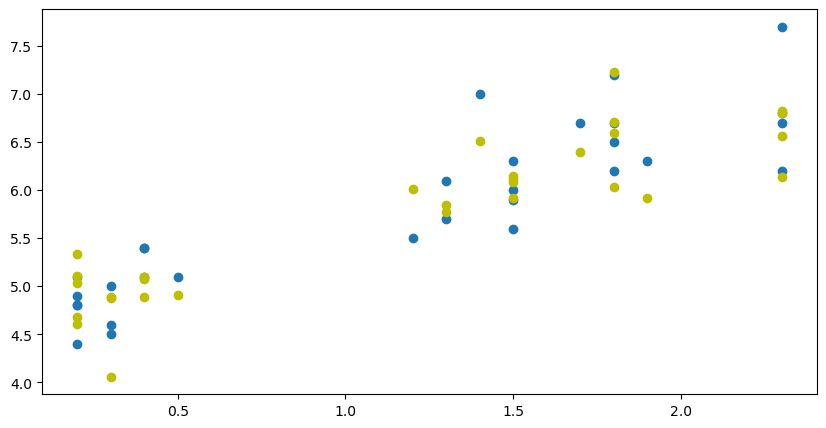

In [60]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['petal width'], y_test, label='y_test')
plt.scatter(X_test['petal width'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()         